# HomeWork 11

**DeadLine : 23:59 20 Azar 1399**

**Total points : 100pts**


Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 30 pts**

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [8]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    res = image.copy()
    
    #Write your code here
    # Used the psuedocode of this blog: http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/
    
    _, image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

    res = np.zeros(image.shape, np.uint8)
    kernel = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], dtype=np.uint8)

    while cv2.countNonZero(image)!=0:
        eroded = cv2.erode(image, kernel)
        open_ = cv2.dilate(eroded, kernel)
        res = cv2.bitwise_or(res, cv2.subtract(image, open_))
        image = eroded
        
    res = cv2.bitwise_not(res)
    
    return res

Test your implementation (don't change this cell).

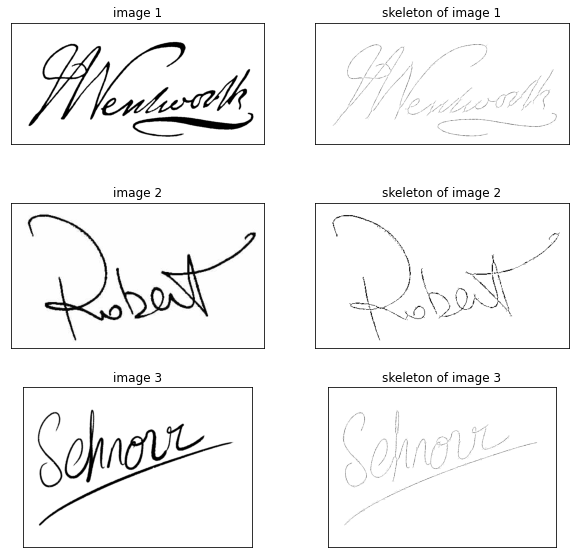

In [9]:
image_list = []

image1 = cv2.imread(os.path.join('images', 'q3a.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image_list.append([get_skeleton(image1), 'skeleton of image 1','img'])

image2 = cv2.imread(os.path.join('images', 'q3b.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image_list.append([get_skeleton(image2), 'skeleton of image 2','img'])

image3 = cv2.imread(os.path.join('images', 'q3c.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image_list.append([get_skeleton(image3), 'skeleton of image 3', 'img'])

plotter(image_list, 3, 2, True, 10, 10, 'Q3')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [25]:
size = 5
structuring_element = np.ones((size, size),np.uint8)
dim, _ = structuring_element.shape
winthresh = dim//2

def gray_dilate(image):
    result = image.copy()
    rows, cols = image.shape
    for i in range(winthresh, rows-winthresh):
        for j in range(winthresh, cols-winthresh):
            window = image[i-winthresh:i+winthresh, j-winthresh:j+winthresh]
            result[i, j] = np.max(window)
    return result

def gray_erode(image):
    result = image.copy()
    rows, cols = image.shape
    for i in range(winthresh, rows-winthresh):
        for j in range(winthresh, cols-winthresh):
            window = image[i-winthresh:i+winthresh, j-winthresh:j+winthresh]
            result[i, j] = np.min(window)
    return result


Please, set your structuring element here:

In [26]:
structuring_element = np.ones((size, size),np.uint8)

Implement these functions for calculating dilation and erosion in RGB space.

In [30]:
def RGB_dilate(image, structuring_element):
    '''
    Applies dilation in RGB space.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        dilated_image (numpy.ndarray): The dilated result image.   
    '''
    
    img = image.copy()
    dilated_image = image.copy()
    
    #Write your code here
    image = cv2.copyMakeBorder(image, 2, 2, 2, 2, cv2.BORDER_REFLECT)
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]
    
    red_dilated = gray_dilate(red_channel)
    green_dilated = gray_dilate(green_channel)
    blue_dilated = gray_dilate(blue_channel)

    dilated_image = cv2.merge([red_dilated, green_dilated, blue_dilated])
    rows, cols, _ = dilated_image.shape
    
    
    return dilated_image[2:rows-3, 2:cols-3]

In [31]:
def RGB_erode(image, structuring_element):
    '''
    Applies erosion in RGB space.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        eroded_image (numpy.ndarray): The eroded result image.   
    '''
    
    img = image.copy()
    eroded_image = image.copy()
    
    #Write your code here
    image = cv2.copyMakeBorder(image, 2, 2, 2, 2, cv2.BORDER_REFLECT)
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]
    
    red_eroded = gray_erode(red_channel)
    green_eroded = gray_erode(green_channel)
    blue_eroded = gray_erode(blue_channel)

    eroded_image = cv2.merge([red_eroded, green_eroded, blue_eroded])
    rows, cols, _ = eroded_image.shape

    return eroded_image[2:rows-3, 2:cols-3]


Test your implementation (don't change this cell).

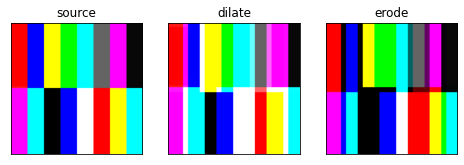

In [32]:
image_list = []
image = cv2.imread(os.path.join('images', 'q4.jpg'), cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([RGB_dilate(image, structuring_element), 'dilate', 'img'])
image_list.append([RGB_erode(image, structuring_element), 'erode', 'img'])
plotter(image_list, 1, 3, True, 8, 6, 'Q4')

To create proper files for sending in the Quera run this cell, please.

In [33]:
!python notebook_converter.py

End!!!